# Brain Cancer Classification

## Importing Libraries

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

## Loading Data

In [2]:
s = "/kaggle/input/brain-cancer-detection-mri-images/Dataset"
images = []
labels = []
for i in os.listdir(s):
    path = os.path.join(s,i)
    if os.path.isdir(path):
        for j in os.listdir(path):
            img = os.path.join(path,j)
            img1 = cv2.imread(img)
            img1 = cv2.resize(img1, (512,512))
            img1 = img1 / 255.0 
            images.append(img1)
            labels.append(i)
labels = [1 if x == 'tumor' else 0 for x in labels]
images = np.array(images) 
labels = np.array(labels)

## Splitting Data

In [3]:
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.1,random_state=123)

## Plotting 10 random images

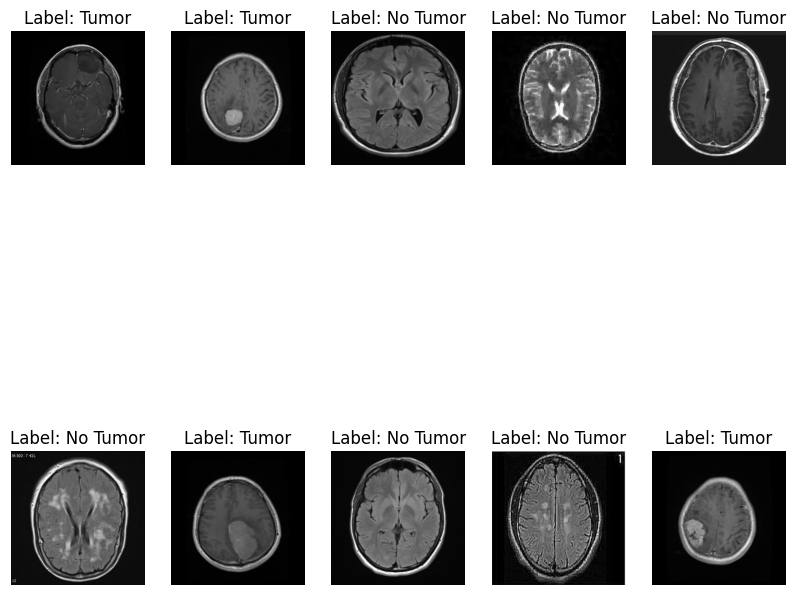

In [4]:
random_indices = np.random.choice(len(images), 10, replace=False)

plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[idx])
    plt.title(f"Label: {'Tumor' if labels[idx] == 1 else 'No Tumor'}")
    plt.axis("off")
plt.show()

## Model Creation

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8,(3,3),activation='relu',input_shape=(512,512,3)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Model Training

In [6]:
model.fit(images,labels,epochs=8,validation_split=0.1)

Epoch 1/8


I0000 00:00:1726065082.401962      76 service.cc:145] XLA service 0x7b2670004740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726065082.402024      76 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1726065082.402029      76 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 2/23 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.5000 - loss: 0.8535

I0000 00:00:1726065087.552175      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 272ms/step - accuracy: 0.6842 - loss: 0.6627 - val_accuracy: 0.9875 - val_loss: 0.3481
Epoch 2/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.8782 - loss: 0.3365 - val_accuracy: 0.8375 - val_loss: 0.5104
Epoch 3/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8992 - loss: 0.2443 - val_accuracy: 0.7875 - val_loss: 0.5539
Epoch 4/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9603 - loss: 0.1647 - val_accuracy: 0.8125 - val_loss: 0.5318
Epoch 5/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9653 - loss: 0.1123 - val_accuracy: 0.8500 - val_loss: 0.4881
Epoch 6/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9857 - loss: 0.0964 - val_accuracy: 0.7000 - val_loss: 0.5546
Epoch 7/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.9787 - loss: 0.0831 - val_accuracy: 0.7125 - val_loss: 0.5267
Epoch 8/8
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.9899 - loss: 0.0692 - val_accuracy: 0.7625 - val_loss: 0.4863


## Model Evaluation

In [7]:
loss,acc = model.evaluate(test_images,test_labels)
print("Model Accuracy: ",round(acc,4))
print("Model Loss: ",round(loss,4))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9898 - loss: 0.3150
Model Accuracy:  0.9875
Model Loss:  0.3165


## Testing

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        45

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



<Axes: >

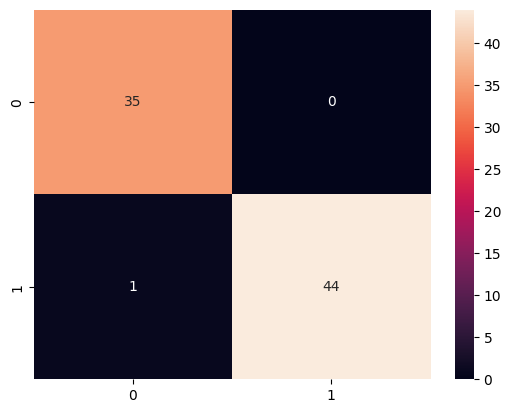

In [8]:
preds = model.predict(test_images)
preds = (preds > 0.5).astype(int)
print("Classification Report\n",classification_report(preds,test_labels))
sns.heatmap(confusion_matrix(preds,test_labels),annot=True)

In [9]:
model.save('brain_cancer.keras')